## Classification

### Basic terminology

In all machine learning projects that we have considered so far, we were given a set of observations (or instances) in the form of some features-label pairs and our main objective was to build a model that would be able to predict the label values based on the provided feature values as accurately as possible; the label values are often called the *target*. This type of machine learning is known as *supervised machine learning*. It is *supervised* in the sense that the label values are available to us in the process of training the model, so that the machine learning algorithm can be guided by labeled examples towards better and better model. A little bit later, we are going to learn about another type of machine learning called *unsupervided*. As you can easily guess, unsupervise machine learning is used in situations when the label values are not available. We will discuss unsupervised machine learning in due course. But first, let's take a look at another example of supervised machine learning called *classification*.

When doing regression, we usually assume that the target can take any values from some continuous range. The classification task deals with situations when the target can only take values from a discrete set, which is usually rather small. For example, we might be interested in building a machine learning algorithm that would be able to tell apart spam and "ham" email messages. In this case, the number of possible target values, also known as *classes*, is just two: spam and "ham". When there are only two possible classes we will call it *binary classification*. Or, we might want to build a model identifying handwritten digits from zero to nine. In this case, the number of classes would be equal to ten; when the number of possible classes is greater than two we will call it *multiclass classifiction*.

### Predicting Probabilities

So, how do we assign classes to different instance? The main idea here is that we need to build a machine learning model predicting probabilities of different classes. To keep things simple, let's start by considering the binary classifation task. In this case, there are only two classes, say 0 (*negative* class) and 1 (*positive* class). If we somehow managed to compute the probability of one of the classes for some particular instance then it would be easy to make a prediction: if the probability of class 1 is less than 0.5 then we predict class 0 for this instance and if the probability is larger than 0.5 then we predict class 1 (in an unlikely event that some of the predicted probabilities come out to be exactly 0.5 we will conventionally predict the positive class).

## Logistic Regression

### The sigmoid function

But now the question becomes: How are we supposed to compute these probabilities? Well, there are many different machine learning algorithms that are designed specifically for this kind of job and in our class we will consider some of those. We are going to begin our discussion with the classification model knows as *logistic regression*. To introduce the main ideas and terminology we will consider logistic regression in the binary classification settings. In this case, there are only two classes, say 0 and 1, and we only need to come up with a method for predicting the probability $p$ of one of the classes, say class 1. The probability of class 0 will always be equal to $1-p$.

One might be tempted to use a linear function of features to model the probability $p$; for example, something like this:

$$
\theta_0 x_0 + \theta_1 x_1 + \ldots + \theta_n x_n = \boldsymbol{\theta}^T\cdot\mathbf{x}\;,
$$

where $n$ is the number of features, and $x_0$ is always equal to one. The problem with this approach is that such a linear function does not have the right properties that we normally expect from probabilities. For example, we know that all probabilities must fall into the range from 0 to 1. But the linear function given above is not bounded, so there is absolutely no reason to expect that it will take values from this range. If we decided to use this function to model the probabilities then we could easily end up with negative probability values, or probability values which are larger than one. This is not acceptable, so we need to somehow bring the probability values into the right range. 

The *logistic regression* model overcomes this problem by postulating that the predicted probabilities of the *positive class* (class 1) are given by the following formula:

$$
\hat p = \sigma(\boldsymbol{\theta}^T\cdot\mathbf{x})\;,
$$

where

$$
\sigma(t) = \frac{1}{1 + \exp{(-t)}}\;, 
$$

is the so-called *sigmoid* or *logistic function*. The graph of this function is shown below; as you can see, the sigmoid function has a very characteristic S-shape which makes it very well-suited for modeling probabilities.

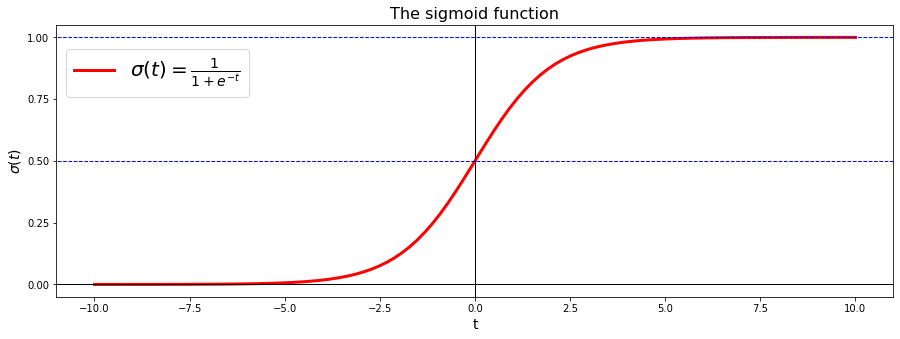

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

t = np.linspace(-10, 10, 100)
sigma = 1/(1+np.exp(-t))

plt.plot(t, sigma, label=r'$\sigma(t)=\frac{1}{1+e^{-t}}$', 
         linewidth=3, color='red')

plt.xlabel('t', fontsize=14)
plt.ylabel(r'$\sigma(t)$', fontsize=14)
plt.yticks([0.00, 0.25, 0.50, 0.75, 1.00])
plt.title('The sigmoid function', fontsize=16)

x_min = plt.gca().get_xlim()[0]
x_max = plt.gca().get_xlim()[1]
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]

for y in [0, 0.5, 1.0]:

  if y == 0:
    ls='-'
    color='black'
  else:
    ls='--'
    color='blue'

  plt.axhline(y=y, xmin=x_min, xmax=x_max, ls=ls, color=color, lw=1.0)

plt.axvline(x=0, ymin=y_min, ymax=y_max, ls='-', color='black', lw=1.0)

plt.legend(loc= 'upper left', bbox_to_anchor=(0.0, -0.05, 1.0, 1.), fontsize=20)
plt.show()

We see that for large positive values of  $t=\boldsymbol{\theta}^T\cdot\mathbf{x}$ the predicted probability is close to one because in this case $\exp{(-t)}\approx 0$ in the definition of the sigmoid function. This can happen when at least one feature $x_i$ is large and positive. On the other hand, we see that the predicted probability approaches zero as the parameter $t$ is becoming more and more negative because in this case $\exp{(-t)}$ becomes very large. This is typical for a situation when at least one feature $x_i$ is very negative. 

For intemediate values of $t$ the predicted probability smoothly transitions between these extreme values. The probability value computed for a given instance can be used to assign a class to this instance according to the following rule:

$$
\hat y = \left\{ \begin{array}{cc} 
0 & \text{if }\; \hat p < 0.5\;, \\
1 & \text{if }\; \hat p \ge 0.5\;.  
\end{array}
\right.
$$

Note that the sigmoid function is smaller than 0.5 for negative values of $t$ and greater than 0.5 for positive values of $t$. 

### The logit function

The parameter $t$ is the inverse of the sigmoid function; it is often called the *logit*. 

$$
p = \frac{1}{1 + \exp{(-t)}} \quad\Rightarrow\quad \exp{(-t)} = \frac{1}{p}-1 = \frac{1-p}{p}\;.
$$

Thus,

$$ \DeclareMathOperator{\logit}{logit}
t = \logit (p) = \ln  \frac{p}{1-p}\;.
$$

Note that $p$ is the estimated probability for the positive class and $1-p$ is the estimated probability for the negative class. The ratio of these probabilities is typically called the *odds* and the logit $t$ is also called the *log-odds* because it is equal to the natural logarithm of the odds. The main assumption of logistic regression is that the log-odds is a linear function of the features.

### Training logistic regression

#### The loss function of a single training instance

To be able to compute the predicted probabilities we need to determine the values of the weights $\theta_i$ ($i=1, 2, \ldots , n$) and the bias term $\theta_0$. How do we do that? Well, the idea here is going to be very similar to the one we used for linear regression: we will adjust these parameters to minimize a certain *loss function*. In the case of linear regression, we used $\text{MSE}$, the average value of the squares of the residuals as a loss function. But what loss function would make sense for the classification task? In order to answer this question let's start by looking at a single training instance. For linear regression, the contribution to the total loss function from a single data point was determined by the absolute value of the residual, the observed value minus the predicted value, computed for this point. Logistic regression utilizes the following function to estimate the quality of our prediction on a single data point:

$$
l(\boldsymbol{\theta}) = \left\{ \begin{array}{cc} 
-\ln\left(\hat p\right) & \text{if }\; y = 1\;, \\
-\ln\left(1-\hat p\right) & \text{if }\; y = 0\;,  
\end{array}
\right.
$$

where $\hat p$ is the predicted probability and $y$ is the actual, or observed, class for this instance. This object, $l(\boldsymbol{\theta})$, is called the loss function of a signle training instance and it makes perfect sense if you think about it. Indeed let's consider two cases, $y=1$ and $y=0$. When the actual class is one, we use $-\log\left(\hat p\right)$ as our loss. This function approaches zero when $\hat p$, the probability of the positive class, is close to one, so the loss value is very low; on the other hand, when $\hat p$ is close to zero we are obviously making an incorrect prediction. The natural log function approaches $-\infty$ as the argument approaches zero, so, when the probability is close to zero, the loss, $-\log\left(\hat p\right)$, becomes very large -- our model suffers a very severe penalty for making this wrong prediction. Note also, that, in this case, the incorrect prediction (class 0) is made with a high degree of confidence since the predicted probability of the positive class (which is the correct class) is close to zero; the smaller the predicted probability of the positive class the larger the loss. So, the loss function above does exactly what we want it to do: it penalizes incorrect predictions (which is any prediction with $\hat p\ne 1$) and the penalty becomes more severe for incorrect predictions made with a high level of confidence (when $\hat p$ is close to zero). 

Using very similar arguments we can convince ourselves that when $y=0$, the loss function is low when the predicted probability of the positive class $\hat p$ is close to zero (correct, or almost correct, prediction) and high when this probability is close to one (incorrect, or almost incorrect prediction). I am leaving it to you as an excercise to show that this is indeed the case.

### The cost function

If we now compute the loss function $l(\boldsymbol{\theta})$ for every training instance and average out the results, we get get the loss function for the entire traning data set. This average loss $J(\boldsymbol{\theta})$ is often called the *log loss* and it can be written in the form of a single mathematical expression, as follows.

$$
J(\boldsymbol{\theta}) = -\frac{1}{m}\sum\limits_{i=0}^{m-1}\left[ y^{(i)}\ln \left(\hat p^{(i)}\right) + \left( 1 - y^{(i)}\right)\ln \left( 1-\hat p^{(i)}\right)\right]\;,
$$

where $y^{(i)}$ is the observed class label and $\hat p^{(i)}$ is the predicted probability of the positive class for training instance $i$. When $y^{(i)} = 1$, the second term in this sum vanishes and when $y^{(i)} = 0$, the same happens with the first term; this is in full agreement with the formula for the loss function $l(\boldsymbol{\theta})$ given above. 

The main objective of logistic regression is to find the weights and the bias term that minimize the log loss. Unfortunately, this minimization cannot be performed analytically, so there is no analog of the normal equation for logistic regression and we must rely on the gradient descent method to solve this problem. The gradient descent works in pretty much the same way as before: we initialize the weights and the bias term with some random values and then update these parameters using gradients of the loss function:

$$
(\theta_j)_{\text{new}} = \theta_j - \eta \cdot \frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j}\;,\quad j=0, 1, 2, \ldots, n\;.
$$

The only difference is that now we are using the log loss in place of the mean squared error. The partial derivatives of the log loss can be shown to be given by

$$
\frac{\partial J(\boldsymbol{\theta})}{\partial \theta_j} = \frac{1}{m}\sum\limits_{i=0}^{m-1}\left[\hat p^{(i)}- y^{(i)} \right]x^{(i)}_j = \frac{1}{m}\sum\limits_{i=0}^{m-1}\left[\sigma\left(\boldsymbol{\theta}^T\cdot\mathbf{x}^{(i)} \right)- y^{(i)} \right]x^{(i)}_j  \;.
$$

### Derivation of the log-loss derivative

This part is optional. Read it if you want to understand the origin of the formula for the derivative of the log loss given above.

First, let's derive a useful formula for the derivative of the sigmoid function with respect to its argument.

$$
\frac{d\sigma (t)}{dt} = \frac{d}{dt}\left(\frac{1}{1+e^{-t}}\right)=\frac{e^{-t}}{\left( 1+e^{-t}\right)^2} = \frac{1}{1+e^{-t}}\cdot\frac{e^{-t}}{1+e^{-t}}\;.
$$

The first factor in the expression above is just a sigmoid function and the second happen to be equal to $1-\sigma (t)$, as can be seen from the following:

$$
\frac{e^{-t}}{1+e^{-t}} = \frac{1 + e^{-t} - 1}{1+e^{-t}} = 1 - \frac{1}{1+e^{-t}} = 1-\sigma (t)\;.
$$

Thus, we have established that

$$
\frac{d\sigma (t)}{dt} = \sigma (t)\left[ 1-\sigma (t)\right]\;.
$$

Now, we are ready to compute the derivative of the log loss function. But first let's introduce some helpful notation. The probability of the $i^{\text{th}}$ instance can be written as 

$$
\hat p^{i} = \sigma (t^{(i)})\;, \text{where}\quad t^{(i)} = \theta_0 x_0^{(i)} + \theta_1 x_1^{(i)} + \ldots + \theta_n x_n^{(i)}\;,
$$

and $x_j^{(i)}$ stands for the $j^{\text{th}}$ feature of the $i^{\text{th}}$ instance.

Next, we will compute the derivative with respect to $\theta_j$ of the function that appears under the sum in the definition of the log loss function given above. This is a composite function, so we need to utilize the famous [chain rule](https://en.wikipedia.org/wiki/Chain_rule) to compute the derivative:

$$
\frac{d}{d\theta_j}\left\{ y^{(i)}\ln \sigma(t^{(i)}) + (1-y^{(i)})\ln\left[1-\sigma (t^{(i)})\right]\right\} = y^{(i)}\frac{1}{\sigma(t^{(i)})}\frac{d\sigma (t^{(i)})}{dt^{(i)}}\frac{dt^{(i)}}{d\theta_j} + \left( 1 - y^{(i)}\right)\frac{(-1)}{1-\sigma(t^{(i)})}\frac{d\sigma (t^{(i)})}{dt^{(i)}}\frac{dt^{(i)}}{d\theta_j}\;.
$$

The derivative of the sigmoid function is computed above; the derivative of $t^{(i)}$ with respect to $\theta_j$ is simply $x_j^{(i)}$, as can be seen from the definition of $t^{(i)}$. Thus, we expression above becomes (at this point we drop the argument of the sigmoid function to save ourselves some typing; we will reinstate it when we get to the end of the computation):

$$
y^{(i)}\frac{\sigma (1-\sigma )}{\sigma}x_j^{(i)} - \left( 1 - y^{(i)}\right)\frac{\sigma (1-\sigma )}{1-\sigma}x_j^{(i)} = \left[ y^{(i)}(1-\sigma ) - \left( 1 - y^{(i)}\right)\sigma\right] x_j^{(i)}\;.
$$

After distributing the terms inside the square brackets and doing some obvious cancellations we get

$$
\left[y^{(i)} - y^{(i)}\sigma - \sigma + y^{(i)}\sigma\right]x_j^{(i)}  = \left[y^{(i)} - \sigma(t^{(i)}) \right]x_j^{(i)} = \left[y^{(i)} - \hat p^{(i)} \right]x_j^{(i)}\;.
$$

Multiplying this result by $-1/m$ and summing over all possible values of index $i$ yield the formula for the derivative of the log loss function stated above. 

### Example: Iris data set

#### Loading data

As an example, let's consider a famous [Fisher's Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) containing information about 150 different iris flowers. Below, we are loading the data set from from the scikit-learn library and saving it in the form of a Pandas data frame (don't worry if you don't understand all details of the code). 

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data=load_iris()
iris = pd.DataFrame(data=iris_data['data'], columns=[col[:-5] for col in iris_data['feature_names']])
iris['target']=iris_data['target']

#### The first peek at the data.

When given a new data frame, the first thing that you should do is to check its shape by checking the `shape` attribute. This allows you to see how many observations (the number of rows) are included in the data frame and how many features (the number of columns) you are dealing with.

In [ ]:
iris.shape

(150, 5)

The Iris flower data set contains 150 observations and the number of features is four (the fifth column contains the class labels).

Now, let's apply the `head()` function to print to the screen the first six rows:

In [ ]:
iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


You can change the number of rows printed to the screen by passing the desired number of rows as a parameter. If you want to see the rows from the ending part of the data frame use a similar `tail()` function:

In [ ]:
iris.tail()

,sepal length,sepal width,petal length,petal width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### Counting the number of missing values

Are there any missing values in the data set? The Pandas library has special functions `isna()` (note the syntax difference from the NumPy function `isnan()`) and `isnull()` for that (they do the same thing).

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isna.html
iris.isna().head()

,sepal length,sepal width,petal length,petal width,target
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [ ]:
# To see the # of NA's per column
iris.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
target          0
dtype: int64

In [ ]:
# Quick counting of the total number of NA's
iris.isnull().sum().sum()

0

#### Understanding the target

Now, let's take a closer look at the `target`. The following function shows the unique values present in this column and the counts of these unique values.

In [ ]:
iris['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [ ]:
# Making an array of unique values for a given feature (column)
target_unique = iris['target'].unique()
target_unique

array([0, 1, 2])

In [ ]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

We see that there are 3 target classes and they are equally represented in the data set (50 instances each). Each of these classes corresponds to a specific type of iris: 0 - iris setosa, 1 - iris versicolor, and 2 - iris virginica. 

In the data set, we are given geometric sizes (length and width) of two parts of an iris flower: the petal and the sepal (see the picture below). Now, we can try building a model predicting the type of iris based on these sizes.

<img src='https://drive.google.com/uc?export=view&id=1uuKIhiIWho_-4_gCfTxpg4Su4eCApcF7' width='950'>

#### Some other useful functions

The Pandas library provides a few other very useful function and attributes that can be used to explore an unfamiliar data frame. For example, we can easily check the data types of all columns present in the data frame by requesting the `dtypes` attribute:

In [ ]:
iris.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
target            int64
dtype: object

The `info()` function prints to the screen even more information (see below).

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


The `describe()` function provides some basic statistical information about all numerical columns.

In [ ]:
iris.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Pairplot

To visualize the relationships between different numerical columns, it is often useful to plot these columns against each other. This can be easily done with the help of the `pairplot()` function from the `seaborn` package. This package is built on top of the `matplotlib` library and contains a number of very useful function. 

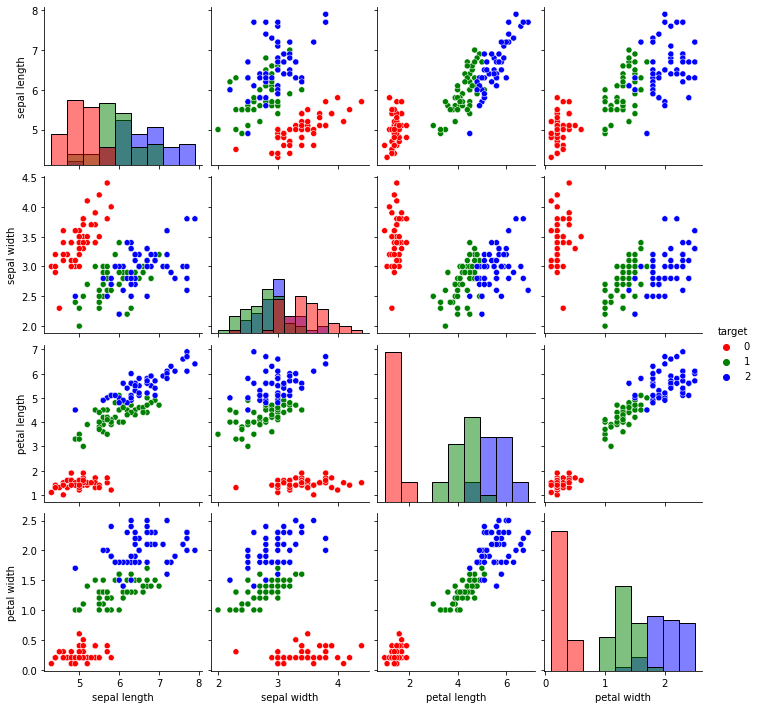

In [ ]:
import seaborn as sns

# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(iris, hue='target', palette={0:'red', 1:'green', 2:'blue'}, diag_kind='hist')
plt.show()

#### Modeling

By inspecting the plots above we observe that there clearly exists a relation between the geometric sizes of iris and its type. Let's try to build a model capturing this relation. To keep things simple and easy to visualize, we will only be using two features, the petal width and the petal length; also, to stay within the framework of binary classification, our model will be designed to distinguish iris virginica (class 2) from the other two types of iris.

In [ ]:
cols=['petal length', 'petal width']

X = iris[cols].values
y = (iris['target']==2).astype(int).values

print(f"The shape of X is {X.shape}.")
print(f"The shape of y is {y.shape}.")
print(f"The unique classes in the target are {np.unique(y)}.")

The shape of X is (150, 2).
The shape of y is (150,).
The unique classes in the target are [0 1].


The next step is to split the data into the training and testing parts. When doing this splitting, it is generally a good idea to keep the overall percentage of the positive class instances the same in both training and testing sets. This can be achieved by utilizing the `stratify` option of the `train_test_split()` function as shown below:

In [ ]:
from sklearn.model_selection import train_test_split

# The 'stratify' option will keep the percentage of positive class 
# instance the same in training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"The percentage of positive class instances in 'y_train' is {(y_train==1).mean():.5f}.")
print(f"The percentage of positive class instances in 'y_test' is {(y_test==1).mean():.5f}.")

The percentage of positive class instances in 'y_train' is 0.33333.
The percentage of positive class instances in 'y_test' is 0.33333.


Now, we can train a logistic regression model on the training data. The good news is that the scikit-learn library has a special class called `LogisticRegression()` that can do this for us -- all we need to do is to create an instance of this class and then train it by passing to it our training data (with labels, of course).

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

# Getting the weights and the bias term is as easy as for linear regression
v_int=log_reg.intercept_[0]
weights=log_reg.coef_[0]

print(f"The weights are {weights[0]:.3f} and {weights[1]:.3f} and the bias term is {v_int:.3f}.")

The weights are 2.448 and 2.023 and the bias term is -15.455.


Visualizing the result of our work (note that to predict the class labels on new data we are using the `predict()` method, just as for linear regression -- this universality of methods is one of the greatest features of the scikit-learn library).

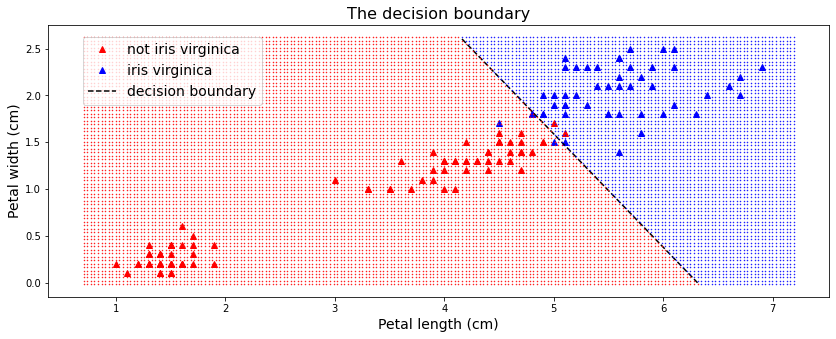

In [ ]:
n_grid_x=200
ms=0.5

plt.figure(figsize=(14, 5))

plt.plot(X[y==0][:, 0], X[y==0][:, 1], '^', 
         color='red', label='not iris virginica')
plt.plot(X[y==1][:, 0], X[y==1][:, 1], '^', 
         color='blue', label='iris virginica')

# This is how you get the maximum and minimum 
# horizontal and vertical coordinates of the plot
x_min = plt.gca().get_xlim()[0]
x_max = plt.gca().get_xlim()[1]
y_min = plt.gca().get_ylim()[0]
y_max = plt.gca().get_ylim()[1]

x1 = np.linspace(x_min, x_max, n_grid_x)

# The number of grid point along the vertical axis
# is adjusted to have the same horizontal and vertical
# spacing between the grid points 
n_grid_y=int(n_grid_x*y_max/x_max)
x2 = np.linspace(y_min, y_max, n_grid_y)

# The decision boundary:
y_db = (-v_int - weights[0]*x1)/weights[1]
mask_db = (y_db<=y_max)&(y_db>=y_min)
plt.plot(x1[mask_db], y_db[mask_db], '--', 
         color='black', label='decision boundary')

# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
x1, x2 = np.meshgrid(x1, x2)
x1 = x1.reshape(n_grid_x*n_grid_y, -1)
x2 = x2.reshape(n_grid_x*n_grid_y, -1)

x_grid=np.hstack((x1, x2))

y_grid = log_reg.predict(x_grid)

plt.plot(x1[y_grid==0], x2[y_grid==0], 'o', color='red', ms=ms)
plt.plot(x1[y_grid==1], x2[y_grid==1], 'o', color='blue', ms=ms)

plt.title("The decision boundary", fontsize=16)
plt.xlabel("Petal length (cm)", fontsize=14)
plt.ylabel("Petal width (cm)", fontsize=14)

plt.legend(loc='upper left', bbox_to_anchor=(0.035, -0.020, 1.0, 1.0), 
           fontsize=14)

plt.show()

The *decision boundary* is a set of points where the predicted probability for the positive class is exactly equal to $1/2$. For such points we have:

$$
\hat p = \frac{1}{2} = \frac{1}{1+e^{-t}} \Rightarrow 2 = 1 + e^{-t}\Rightarrow e^{-t} = 1 \Rightarrow t = 0\;.
$$

In the situation when there are only two features, $t = \theta_0 + \theta_1 x_1 + \theta_2 x_2$, so the equation for the decision boundary becomes

$$
\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 \Rightarrow x_2 = -\frac{\theta_1}{\theta_2} x_1 - \frac{\theta_0}{\theta_2}\;.
$$

Thus, the decision boundary is a straight line; the slope of the line is $-\theta_1/\theta_2$ and its vertical intercept is $-\theta_0/\theta_2$. It is not difficult to generalize this result to the case when the number of features is larger than 2 -- it should be clear that in general, the desicion boundary of logistic regression looks like a hyperplane in the space of all features, given by the following mathematical equation:

$$
\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n = 0\;.
$$

## Assessing the Performance of a Binary Classifier

The graph above suggests that our model is doing a reasonable job distinguishing the iris versicolor flowers from the other two types. Graphical representation of the result is definitely helpful but it would also be nice to have a quantitative measure of the performance of our model. For linear regression we used the values of the $\text{RMSE}$ and $R^2$ parameters to assess the performance (recall that the preformance should be assessed either on a hold-out test set or using cross-validation). What would be a good performance metric for a binary classifier like logistic regression? Well, it turns out that there many different metrics that can be used for this purpose. In our class, we will learn about some of them.

### Accuracy

One obvious thing that you can do is to count the fraction of correct prediction. This performance metric is called *accuracy*. Mathematically, one can define accuracy as follows:

$$
\text{accuracy} = \frac{\text{number of correct predictions}}{\text{total number of predictions}}\;.
$$

It is not difficult to compute the accuracy once we compute the predicted class labels on the test set:

In [ ]:
y_pred=log_reg.predict(X_test)

acc=(y_test == y_pred).mean()

print(f"The accuracy of the model is {acc:.5f}.")

The accuracy of the model is 0.95556.


Alternatively, we can compute the accuracy using a scikit-learn built-in function `accuracy_score()`.

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
from sklearn.metrics import accuracy_score

acc_sklearn = accuracy_score(y_test, y_pred)

print(f"The accuracy of the model computed with the sklearn function is {acc_sklearn:.5f}.")

The accuracy of the model computed with the sklearn function is 0.95556.


We have reached almost 96% accuracy without doing too much heavy lifting! Isn't it amazing? Well, don't get overly excited. Let's see what happens if instead of logistic regression we build a very naive classifier that always predict zero for the target class (essentially, it classifies all flowers as 'not iris virginica'.

In [ ]:
y_pred_dumb = np.zeros(len(y_test))
acc_dumb = accuracy_score(y_test, y_pred_dumb)
print(f"The accuracy score predicted by the 'dumb' classifier is {acc_dumb:.3f}.")

The accuracy score predicted by the 'dumb' classifier is 0.667.


Wow! The accuracy is about 67% and our dumb classifier is indeed very dumb -- it does not predict anything useful. This happened because our data set is imbalanced -- two third of the data belong to class 0 and only one third belongs to class 1. This shows that accuracy is not always a good measure of performance of a classification model, especially in situations when there are imbalanced classes present in the data set.

### Confusion matrix

A much better (and more universal) way to measure the performance of a classifier is to use the so-called *confusion matrix*. For a binary classifier, the confusion matrix is a two by two matrix containing the following elements: 
 * the number of observations from the negative class (0) that were classified as negative (true negatives, TN);
 * the number of observations from the negative class (0) that were classified as positive (false positives, FP);
 * the number of observations from the positive class (1) that were classified as positive (true positives, TP);
 * the number of observations from the positive class (1) that were classified as negative (false negatives, FN);

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, y_pred)
# cm is a 2D NumPy array
print(cm)

[[30  0]
 [ 2 13]]


In this example we have:
  * TN = 30
  * FP = 0
  * TP = 13
  * FN = 2

So, it is clear that our classifier is doing a reasonable job. What about the the 'dumb' classifier?

In [ ]:
cm_dumb=confusion_matrix(y_test, y_pred_dumb)
print(cm_dumb)

[[30  0]
 [15  0]]


The 'dumb' classifier' does not have a single true positive event but it has a lot of false negatives! Not good...

It is easy to plot the confusion matrix using a special function from the scikit-learn library.

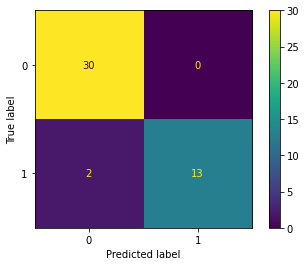

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_reg, X_test, y_test)

Here is a bit prettier (I think) version of the same matrix:

[]

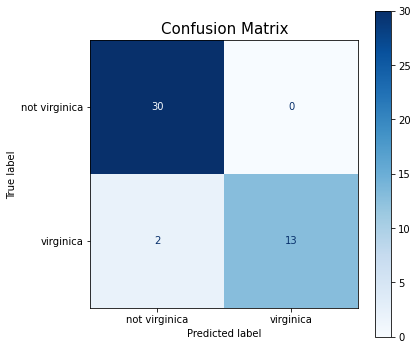

In [ ]:
class_names=['not virginica', 'virginica']
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(log_reg, X_test, y_test,
                      display_labels=class_names, 
                      cmap=plt.cm.Blues, ax=ax)

plt.title('Confusion Matrix', fontsize=15)

plt.plot()

Ok, so what kind of confusion matrix do we want our model to generate? Well, of course, the best confusion matrix you can get is a diagonal one, where there are no false positives or false negatives. If you ever get such a confusion matrix it would mean that you have build a *perfect classifier* because it does not make any incorrect predictions (at least on your test set). But, more realistically, you typically do get a confusion matrix that has some non-diagonal entries. Now the question becomes: Is it better to have less false negatives than false positives or vice versa? It turns out that the answer to this question depends on the taks at hands. 

For example, imaging that you are charged with a task of building a face recognition system that will be used to check whether or not a given person is authorized to perform a certain action by looking at the person's face. Imagine that there is a camera involved in the face recognition process; the camera takes a picture of the person's face and then sends the picture file to the input of your classifier. The job of the classifier is to determine whether the person has a proper authorization or not, so it works as a binary classifier. If the  person is authorized to perform the action the classifier assigns the person class 1; if not, the person is assigned class 0. Now, given that your face recognition system will not be 100% correct, would you prefer it to output more false positives or more false negatives? 

There is no general answer to this question because it all depends on the purpose of your face recognition system. For example, if you are planning on using it in some super-secret government facility to provide access to some highly sensitive classified information only to those who are authorized to do so then you definitely want to minimize your false positives as much as possible. In this situation, a false positive means that you are mistakenly granting access to this super-secret information to somebody who is not supposed to access it at all, perhaps a hacker or a spy. On the other hand, a false negative would simply mean that a person with a proper authorization will not be able to access this information. Of course, the person will get very annoyed and will probably complain but you can always say that preseving the state secrets is your top priority. Of course, it does not mean that you should get lazy and don't try to do a reasonable job minimizing the number of false negatives as well but minimizing false positives will always be your priority in the situation like this.

Now, imagine that you are planning on using the same face recognition system at a supermarket counter to verify that people asking for a discount are actually eligible for it (say, they are members of the supermarket's club or something like this). Here your priorities are going to be the exact opposite: if you don't give a discount to a loyal eligible customer who is asking for it you will be running a risk of loosing this customer forever. On the other hand, giving a discount to somebody who is not a member of the club might be a bit annoying for you but the consequences of that might well be not as bad as those of rejecting an eligible club member. In this case, you should focus on miminizing the number of false negatives.

### Precision and recall

In principle, the confusion matrix tells you everything you need to know about the performance of your classifier. The problem with that is that even for the case of a simple binary classifier this matrix contains four entries and for a multiclass classification task the number of the entries grows quadratically with the number of classes (think why!). But what if you need to summarize this performance in a more concise way? Well, in this case, there are a number of options availalbe to you and, depending on you task, you may find one of these options to be more preferable than the others. For example, you may choose to compute the parameters called *precision* and *recall*. 

The precision of a classifier is defined as the fraction of positive class predictions that turned out to be correct. Mathematically,

$$
\text{precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}\;.
$$

In other words, the precision is the ratio of the number of true positives to the total number of positive class predictions. Essentially, the precision is nothing but the accuracy of our positive class predictions. This parameter litterary tells you how precise your classifier is -- if the precision is close to 100% it means that you have a high level of confidence that all instance assigned to the positive class by the classifier indeed belong to this class. It should be clear from the definition of precision that a value of this parameter close to one indicates a low number of false positives.

At the same time, you should not get too excited if you build a classifier that has a 100% precision -- it is a relatively easy task. Imagine that you classifier predicts positive class only for a single instance and this happens to be correct. Then the precission is $1/(1+0) = 1$. However, it most probably means that your classifier missed a lot of other positive class instances. The point is that high precision does not necessarily mean that your model is great.  For this reason, using the precision alone is usually not the best way to assess the preformance of a classifier: it is typically used in combination with another parameter called *recall*. 

The recall of a classifier is define as the fraction of positive class instances that were predicted correctly. Mathematically,

$$
\text{recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}\;.
$$

In other words, the recall is the ratio of the number of true positives to the total number of positve class instances. This parameter tells us what fraction of the positive class instances your classifier is able to identify (or recall) correctly. It should be clear from the definition of recall that a value of this parameter close to one indicates a low number of false negatives.

Again, don't get too excited if your recall comes out to be close to 100% -- as a matter of fact it is trivial to achieve this result just by declaring that all instances belong to the positive class; of course, if you do that you will completely miss all negative instances.

To compute the precision or recall, one can use `presion_score()` and `recall_score()` function of the scikit-learn library.

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"The precision and recall computed for the test set are {precision:.3f} and {recall:.3f}, respectively.")

The precision and recall computed for the test set are 1.000 and 0.867, respectively.


The performance of a classifier can also be visualized in the form of a so-called *precision-recall* curve. To understand how this curve is constructed we need to learn how to obtain predicted $t$-scores and probability with scikit-learn. 

### Computing scores and probabilities

We saw it ealier how to use the `predict()` method of the `LogistRegression()` class to assign classes to new instances. But what if we would like to access more detailed information about the model's predictions? For example, what if instead of predicting the classes directly, we would like to access the corresponding $t$-score values? Or what if we want to access the predicted probabilities for the positive and negative classes? Later, we will see that this, in fact, gives us much more control over the prediction process and also facilitate our error analysis.

In the scikit-learn library, there are a number of very useful methods that can be used to access this type of information. For example, the `decision_function()` method of the `LogistRegression()` class returns the score $t$ for a given instance.

In [ ]:
# Create a new pair of features
X_new=np.array([[5, 1]])

# Compute the t-score with decision_function()
log_reg.decision_function(X_new)

array([-1.19105215])

In [ ]:
# Computing the t-score directly from the definition
t=np.sum(weights*X_new[0, :]) + v_int
print(t)

-1.191052153814983


The `predict_proba()` method of the `LogistRegression()` class returns the probabilities for both negative and positive classes.

In [ ]:
# Computing the probabilities with predict_proba()
log_reg.predict_proba(X_new)

array([[0.76692919, 0.23307081]])

In [ ]:
from math import exp

# Computing the same probabilities directly

# The probability of the positive class:
p=1/(1+exp(-t))
print(p)

# The probability of the negative class:
print(1-p)

0.23307081171333982
0.7669291882866602


### Precision-recall curves

In all our discussion so far, we have always assumed that we should assign positive class to all instances with predicted probabilities greater or equal than 0.5 and assign negative class to all instances with predicted probabilities are smaller than 0.5. The probability of 0.5 plays the role of a *decision threshold* in our class prediction process (alternatively, we can use a $t$-score of 0 as our decision threshold). But what if we change this threshold? Why would we want to do that? Because this gives us a very easy way to adjust the precision and recall values. Recall that for some machine learning task, it might be advantageous to have a bit higher precision (a bit lower number of false positives) at the expense of a bit lower recall (a bit higher number of false negatives) or vice versa. Moving the threshold affects both the precision and recall in opposite directions. For example, by moving the threshold up, towards 1, we impose a stronger constraint on the predicted probability for classifying a given instance as positive. As a result, our precision will most probably go up (at least on average) because it is the accuracy of our positive class predictions and with the higher threshold (stricter constrains) these predictions should become more and more accurate. In the limiting case when we push the threshold all the way to 1, no instances will be classified as postive, so we won't be making any mistakes at all in our predictions for positive class (but, of course, we won't be predicting any positive class instances either). On the other hand, by pushing the threshold up we will be predicting a smaller number of positive class intances and we will inevitably miss some of the actual positive class instances -- this will decrease our recall. The bottom line is that as we raise the decision threshold, the precision is generally increase (at least on average) but the recall descreases (always, not just on average). This situation is known in machine learning as the *precision/recall trade-off* and it can be best visualized if we plot both precision and recall versus the threshold on the same set of axes.

In scikit-learn, we can use the `precision_recall_curve()` function to compute both precision and recall for different threshold values. To use this function, we will also need to compute the predicted probabilities for the positive class using the `predict_proba()` method.

In [ ]:
 # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html
from sklearn.metrics import precision_recall_curve

# We select the probabilities of the positive class only:
y_probas = log_reg.predict_proba(X_test)[:, 1]

prc, rcl, thr = precision_recall_curve(y_test, y_probas)

print(f"The length of the precision array is {len(prc)}.")
print(f"The length of the recall array is {len(rcl)}.")
print(f"The length of the threshold array is {len(thr)}.")

The length of the precision array is 18.
The length of the recall array is 18.
The length of the threshold array is 17.


Note that the array of thresholds is one element shorter than the arrays of precisions and recalls. This is because scikit-learn add 1 and 0 at the end of the precision and recall arrays, respectively, but the threshold array does not have a matching element for these values. To make all three arrays to have the same length, a simple solution is just to exclude the last elements of the precision and recall array. 

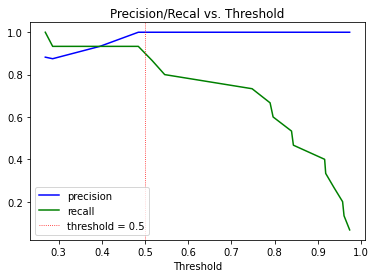

In [ ]:
plt.plot(thr, prc[:-1], color='blue', label='precision')
plt.plot(thr, rcl[:-1], color='green', label='recall')

plt.xlabel('Threshold')
plt.title('Precision/Recal vs. Threshold')

plt.axvline(x=0.5, color='red', linestyle='dotted', linewidth=0.8, label='threshold = 0.5')

plt.legend()
plt.show()

Alternatively, we can plot the precision versus the recall directly.

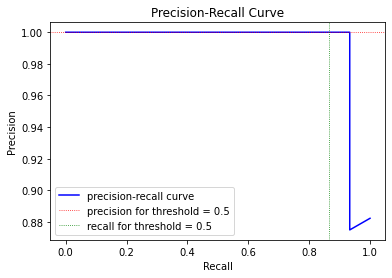

In [ ]:
plt.plot(rcl, prc, color='blue', label='precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.axhline(y=precision, color='red', linestyle='dotted', linewidth=0.8, label='precision for threshold = 0.5')
plt.axvline(x=recall, color='green', linestyle='dotted', linewidth=0.8, label='recall for threshold = 0.5')

plt.legend()
plt.show()

The performancy of a classifier can be measured using the area under the precision-recall curve. This area can be easily computed with the scikit-learn `auc()` function.

In [ ]:
from sklearn.metrics import auc

auc=auc(rcl, prc)

print(f"The area under the precision-recall curve is {auc:.5f}.")

The area under the precision-recall curve is 0.99191.


### F1 score

If you want to compare the pereformance of two different classifiers, you might want to have a single numerical metric available for this comparison. One possible choice of such a metric is the *F1 score*, which is a *harmonic average* of precision and recall.

$$
F_1 = \frac{2}{ \frac{1}{\text{precision}} + \frac{1}{\text{recall}} }\;.
$$

The F1 score is affected by low values of either precision or recall much stronger than the regular mean, so it decreases much more when either one of these parameters gets low (even if the other one is high). The F1 score is generally higher for classifiers that have similar precision and recall scores. On the other hand, if you care more about precision than recall or vice versa you should use the precision-recall curve to find the best compromise.

It is easy to compute the F1 score with the scikit-learn library. Here is an example.

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f"The F1 score is {f1:.5f}.")

The F1 score is 0.92857.


### The ROC curve

Another very popular graphical tool used to analyze the performance of a binary classifier is a so-called *receiver operating characteristic* (ROC) curve. It has a great deal of similarity with the precision/recall curve: the difference is in the parameters plotted on the horizontal and vertical axes. The ROC plots the *true positive rate* (TPR) against the *false positive rate* (FPR) computed for different threshold values. The TPR is simply an alternative name for recall which is the fraction of positive class instances that were correctly identified as positive; sometimes it is also called *Sensitivity*.

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}\;.
$$

The FPR is the fraction of negative class instances that were incorrectly classified as positives. Mathematically,

$$
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}\;.
$$

The FPR is sometimes expressed in terms of a parameter called *Specificity*. By definition, the specificity is the *true negative rate* (TNR) or the fraction of negative class instances that are correctly identified as negative.

$$
\text{Specificity} = \text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}\;.
$$

It is not difficult to see that $\text{FPR} = 1-\text{Specificity}$. Indeed,

$$
1-\text{Specificity} = 1-\frac{\text{TN}}{\text{TN} + \text{FP}} = \frac{\text{TN + FP - TN}}{\text{TN} + \text{FP}} = \frac{\text{FP}}{\text{TN} + \text{FP}}=\text{FPR}\;.
$$

Ideally, we would like the TPR to be as high as possible and FPR to be as low as possible for all threshold values. So, a perfect classifer would have a ROC curve that starts at the origin, then rises along the vertical axis all the way to TPR=1, then goes horizontally to the right all the way to FPR=1. The closer the actual ROC curve to this ideal shape, the higher the performance of our classifier. On the other hand, a classifier that assigns classes randomly (so that it is totally useless) would have a ROC curve that looks like a straight line starting at the origin and going all the way to top right corner of the graph, where both TPR and FPR are equal to 1. A realistic classifier has a ROC curve that lies somewhere between these two extreems.

The usefullness of ROC curves comes from the fact that they can be used to compare performances of different classifiers: this comparision can be made for different threshold values which makes it very convenient. In addition, the area under ROC curve can be used as a measure of the performance of the classifier.

As a rule of thumb, you should use the precision-recall curve when the posititve class is rare or when you care more about the false positives than the false negatives; in all other cases use the ROC curve.

Here is an example illustrating how to plot a ROC curve with the scikit-learn library. The main idea is that we need to make use of the `roc_curve()` function that returns FPR, TPR, and threshold values for a given set of ground truth labels and the corresponding predicted probabilities for the positive class.

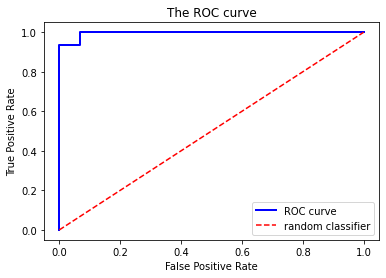

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(y_test, y_probas)

plt.plot(fpr, tpr, linewidth=2, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], ls='--', color='red', label='random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The ROC curve')
plt.legend()
plt.show()

The area under the curve can be computed with the help of the `roc_auc_score()` function.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc=roc_auc_score(y_test, y_probas)

print(f"ROC AUC = {roc_auc:.5f}.")

ROC AUC = 0.99556.
